# Code

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Dataset
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75], 
[1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25], 
[4.50], [5.50]])
Y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

def getPredictions(X, model):
  '''Takes dataset X and the model then returns an array of predictions for each x'''
  predictions = list()
  for x in X:
    prediction = model[0] #add intercept parameter
    for i in range(len(x)):
      prediction += x[i] * model[i+1] #add x value multiplied by associated coefficient parameter
    predictions.append(prediction)
  for i in range(len(predictions)):#calculate predictions
    predictions[i] = 1/(1 + math.exp(-predictions[i])) 
  return predictions

def getLoss(predictions, Y):
  '''Takes model predictions and data labels Y then returns the models loss for this data'''
  loss = 0.0
  for i in range(len(Y)):#find sum of the cost function for each prediction
    loss += -(Y[i] * math.log(predictions[i])) -((1 - Y[i]) * math.log(1 - predictions[i]))
  loss = loss / len(Y)#calculate loss
  return loss

def Train(learningRate, X, Y, predictions, model):
  '''Takes learning rate, dataset X, data labels Y, model predictions and the model to be trained then returns a trained version of the model'''
  #update intercept parameter
  change = 0.0
  for i in range(len(Y)):
    change += (predictions[i] -  Y[i]) 
  change = change * (learningRate / len(Y))
  model[0] = model[0] - change
  #update all coefficient parameters
  for parameter in range(1, len(model)):
    change = 0.0
    for i in range(len(Y)):
      change += (predictions[i] -  Y[i]) * X[i][parameter - 1]
    change = change * (learningRate / len(Y))
    model[parameter] = model[parameter] - change
  return model

def LogisticRegression(learningRate, iterations, X, Y, model):
  '''Takes learning rate, training iterations, dataset X, data labels Y and the model to be trained then returns a trained version of the model'''
  loss = list()
  for iteration in range(iterations):
    predictions = getPredictions(X, model) #calculate predictions
    loss.append(getLoss(predictions, Y)) #calculate loss
    model = Train(learningRate, X, Y, predictions, model) #update model parameters
  #plot loss per iteration graph
  plt.plot(loss)
  plt.ylabel('Loss')
  plt.xlabel('Iteration')
  plt.show()
  return model

# Test

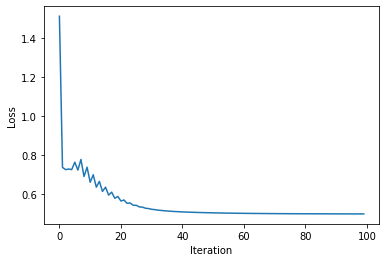

[0.09610736303278608, 0.12041158112124868, 0.14984311030605335, 0.18495574818990448, 0.22610800680984044, 0.27334576107502623, 0.5709720434284368, 0.8864279227091879, 0.27334576107502623, 0.6314690996156641, 0.9094936845096107, 0.32629136956705673, 0.38407184770511943, 0.4453209499558577, 0.5082772142408946, 0.6880955307283955, 0.7852695126848683, 0.8248197703859689, 0.8583990089997598, 0.9433679322408358]
[-2.746657221740257, 1.0108251286128813]


In [2]:
model = [1, 1] #untrained model with parameters initialised to 1
model = LogisticRegression(1,100,X,Y,model)
print(getPredictions(X,model))
print(model)